In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import urllib
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
a = input('Enter the username:')
source = 'https://twitter.com/' + a
page = urllib.request.urlopen(source)
soup = BeautifulSoup(page, 'lxml')
print(source)

Enter the username:elonmusk
https://twitter.com/elonmusk


In [6]:
#number of replies
replies = []
for link in soup.findAll('span', 'ProfileTweet-action--reply u-hiddenVisually'):
    replies.append(int((link.find('span', 'ProfileTweet-actionCount')['data-tweet-stat-count'] or '0')))

In [7]:
#number of retweets
retweets = []
for link in soup.findAll('span', 'ProfileTweet-action--retweet u-hiddenVisually'):
    retweets.append(int((link.find('span', 'ProfileTweet-actionCount')['data-tweet-stat-count'] or '0')))

In [8]:
#number of favorites
favorites = []
for link in soup.findAll('span', 'ProfileTweet-action--favorite u-hiddenVisually'):
    favorites.append(int((link.find('span', 'ProfileTweet-actionCount')['data-tweet-stat-count'] or '0')))

In [9]:
#date
dates = []
for link in soup.findAll('span', class_=['_timestamp js-short-timestamp ', '_timestamp js-short-timestamp js-relative-timestamp']):
    dates.append(link.text)

In [10]:
#tweet
tweets = []
for link in soup.findAll('p', class_='TweetTextSize TweetTextSize--normal js-tweet-text tweet-text'):
    tweets.append(link.text)
print(len(tweets))

20


In [11]:
#combines replies, retweets, favorites, and dates to one dataframe
data = pd.DataFrame({'Replies':replies, 'Retweets':retweets, 'Favorites':favorites, 'Date':dates})
data.set_index('Date', inplace = True)
print(data)

        Replies  Retweets  Favorites
Date                                
Oct 8       932      3284      27375
17h        8699     40374     166514
18h        2658     14226      64557
Oct 12     3939     27674     167828
Oct 12      215      1157       3495
Oct 12     1994      8805      51126
Oct 12     1619      6766      46953
Oct 10     1153      3170      30987
Oct 9      1001      4626      36487
Oct 9      1220      6296      28441
Oct 8       123       690       7540
Oct 8       186      1172       6577
Oct 8       694     10016      46088
Oct 7       118      1463       8001
Oct 8       272      1062       5464
Oct 8       149      1828      12787
Oct 8        82      1215       9065
Oct 8       455      4118      48520
Oct 7       880     11720      79628
Oct 7      1791     25731     189999


AxesSubplot(0.125,0.125;0.775x0.755)


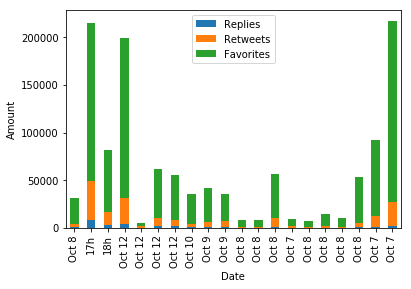

In [12]:
#creates a stacked bar graph of replies, retweets, and favorites
data_stacked_bar = data.plot(kind='bar', stacked=True)
data_stacked_bar.set_ylabel('Amount')
print(data_stacked_bar)

In [13]:
#finds mean of favorites, retweets, and replies
fav_mean = data.Favorites.mean()
rt_mean = data.Retweets.mean()
reply_mean = data.Replies.mean()

In [16]:
#finds median of favorites, retweets, and replies
fav_med = data.Favorites.median()
rt_med = data.Retweets.median()
reply_med = data.Replies.median()

              Means  Medians
Labels                      
Favorites  51871.60  33737.0
Retweets    8769.65   4372.0
Replies     1409.00    906.0


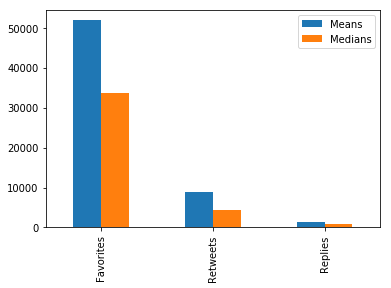

In [47]:
means = [fav_mean, rt_mean, reply_mean]
medians = [fav_med, rt_med, reply_med]
labels = ['Favorites','Retweets','Replies']
means_medians = pd.DataFrame({'Means':means, 'Medians':medians, 'Labels':labels})
means_medians.set_index('Labels', inplace=True)
mm_plot = means_medians.plot(kind='bar')
mm_plot.set_xlabel('')
print(means_medians)